<h1>
    Applied Discrete Structures - Graphs
</h1>

<blockquote>
    Applied Discrete Structures by Alan Doerr and Kenneth Levasseur is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 3.0 United States License. You are free to Share: copy and redistribute the material in any medium or format; Adapt: remix, transform, and build upon the material. You may not use the material for commercial purposes. The licensor cannot revoke these freedoms as long as you follow the license terms.
</blockquote>

<h2>
    Directed Graphs
</h2>

<h4>
    How to create directed graphs
</h4>

<p>
    A directed graph consists of a set of vertices, <m>V</m>, and a set of edges, <m>E</m>, which is a subset of <m>V\times V</m>.  You can specify a graph in SageMath using a variety of different formats.  The following all generate the same graph with 7 vertices.  Notice that when they are displayed, the vertices are in different positions.  Each of these is images shows a different <q>embedding</q> of the graph, but the graphs are all equal because they consist of the same vertex and edge sets. 
</p>

<p>
  The argument to to DiGraph here is a list consisting of a list of vertices and then a list of edges.  Just like the definition!  
</p>

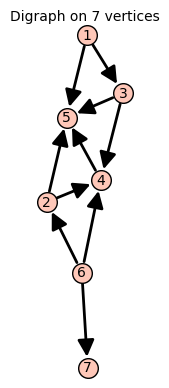

In [142]:
g=DiGraph([[1..7],[(1,3),(1,5),(2,4),(2,5),(3,4),(3,5),(4,5),(6,2),(6,4),(6,7)]])
g

<p>
    You can just lists the edges, but if your graph has an isolated vertex, one that has no edges into or out of it, you can't use this directly.
</p>

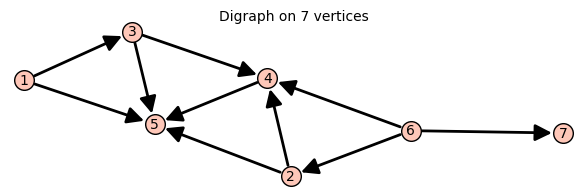

In [5]:
DiGraph([(1,3),(1,5),(2,4),(2,5),(3,4),(3,5),(4,5),(6,2),(6,4),(6,7)])

<p>
    You can also use a <q>dictionary</q>, which is a basic Python data structure.  Each vertex with an outgoing edge has a list of destination edges specified.
</p>

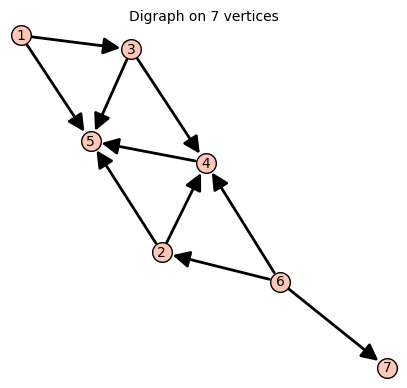

In [10]:
DiGraph({1:[3,5],2:[4,5],3:[4,5],4:[5],6:[2,4,7]})

<p>
    You can specify a graph by its adjacency matrix. See <a href="http://faculty.uml.edu/klevasseur/ads/s-matrices-of-relations.html">Chapter 6 of Applied Discrete Structures</a> for more on adjacency matrices. However, since we haven't specified the vertex set, the default is to start at zero in numbering.   So this graph isn't really equal to the others, but it is <q>isomorphic</q> to the others.   See <a href="http://faculty.uml.edu/klevasseur/ads/s-graphs-introduction.html">Chapter 9 of Applied Discrete Structures</a> for more on isomorphic graphs.
</p>

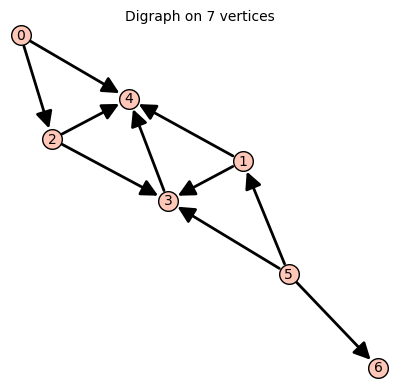

In [23]:
DiGraph(Matrix([[0, 0, 1, 0, 1, 0, 0],
                    [0, 0, 0, 1, 1, 0, 0],
                    [0, 0, 0, 1, 1, 0, 0],
                    [0, 0, 0, 0, 1, 0, 0],
                    [0, 0, 0, 0, 0, 0, 0],
                    [0, 1, 0, 1, 0, 0, 1],
                    [0, 0, 0, 0, 0, 0, 0]]))

<h4>
    Methods applied to directed graphs.
</h4>

<p>
    Once you have directed graph, you can do several things to it.  The first version of the graph above was called <c>g</c>.  We can act on it with several <q>methods</q> including the following.
</p>
<p>
    We can extract the adjacency matrix of the graph:
</p>

In [24]:
g.adjacency_matrix()

[0 0 1 0 1 0 0]
[0 0 0 1 1 0 0]
[0 0 0 1 1 0 0]
[0 0 0 0 1 0 0]
[0 0 0 0 0 0 0]
[0 1 0 1 0 0 1]
[0 0 0 0 0 0 0]

<p>
    Suppose we wanted to add an isolated vertex, numbered zero. We can do that:
</p>

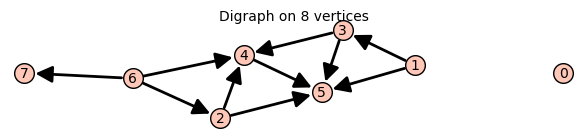

In [46]:
g.add_vertex(0)
g

<p>
    We can sequentally remove the edge from 6 to 4 and add an edge from 6 to 0.  Notice how the embedding of the graph's vertices changes in most cases.  This can be avoided and we will show how later. <b>Important: <c>add_vertex</c> and <c>delete_vertex</c> are methods that change the graph they act on, as opposed to creating a new graph with the added/deleted edge.</b>.
</p>

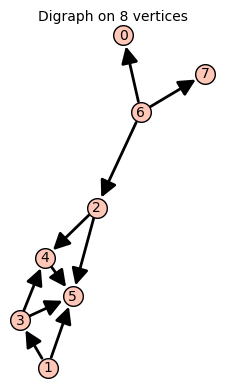

In [140]:
g.delete_edge((6,4))
g.add_edge((6,0))
g

<p>
    Image the current value of <c>g</c> to be a miniature version of the internet with edges being links.  The "Page Rank" algorithm that is the basis for Google searches computes the most important <q>sites</q>.  In this case, it isn't surprising that vertex 5 is ranked highly.
</p>

In [43]:
g.pagerank()

{0: 0.0927902991959933,
 1: 0.07230412924363107,
 2: 0.09279029919599316,
 3: 0.10303338417217418,
 4: 0.15552919467510215,
 5: 0.31845826507748193,
 6: 0.07230412924363099,
 7: 0.09279029919599317}

<p>
    The transitive closure of a graph is created by starting the graph and then adding an edge between any two vertices that can be connected through a path of any length.  For example, in the current graph, we can go from 6 to 2 and then from 2 to 5, so an edge from 6 to 5 is added. <b>Unlike methods like <c>add_vertex</c>, <c>transitive_closure</c> creates a new graph.</b>  No further change in <c>g</c> takes place when the following is evaluated.
</p>

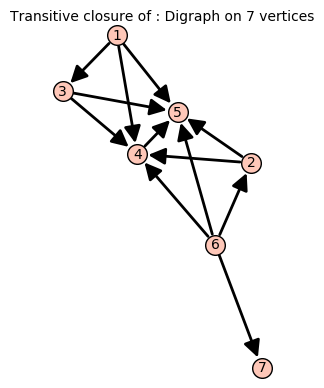

In [137]:
g.transitive_closure()

<h2>
    Undirected Graphs
</h2>

<p>
   Undirected graphs are the same as directed graphs except that the edges have no direction associated with them.  When an undirected graph is drawn, the edges are simply lines, or arcs.  <c>Graph</c>, instead of <c>DiGraph</c>, is used to create an undirected graph.
</p>

<p>
    Using the same edge list as we used in introducing directed graphs, we get a different image.
</p>

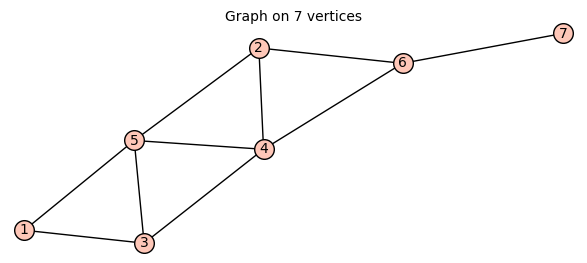

In [55]:
u=Graph([[1..7],[(1,3),(1,5),(2,4),(2,5),(3,4),(3,5),(4,5),(6,2),(6,4),(6,7)]])
u

<p>
    The other variations for creating a directed graph that were demonstrated above are available for undirected graphs.  However, an adjacency matrix for an undirected graph must be symmetric, as in the following simple example.
Notice that you can have loops, edges that start and end a the same vertex in either type graph.</p>

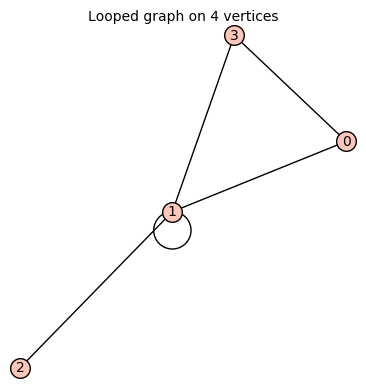

In [64]:
Graph(Matrix([[0, 1, 0, 1],
              [1, 1, 1, 1],
              [0, 1, 0, 0],
              [1, 1, 0, 0]]))

<p>
    The degree sequence lists the degrees of each vertex, sorted in decreasing order.  For directed graphs, out-degrees and in-degrees can be computed.
</p>

In [65]:
u.degree_sequence()

[4, 4, 3, 3, 3, 2, 1]

<p>
    Here are a few more methods that we can apply to a graph, in this case the one we called <c>u</c>.  There are far more than we show here.
</p>

In [70]:
u.is_connected()

True

In [71]:
u.diameter()

4

In [72]:
u.chromatic_number()

3

<h4>
    Special Graphs
</h4>

<p>
    There are several families of graphs that can be created by name.  Again, we only have a few of them here.
</p>

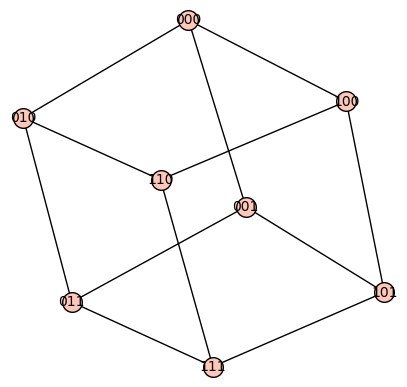

In [73]:
h=graphs.CubeGraph(3)
h.plot(layout="spring")

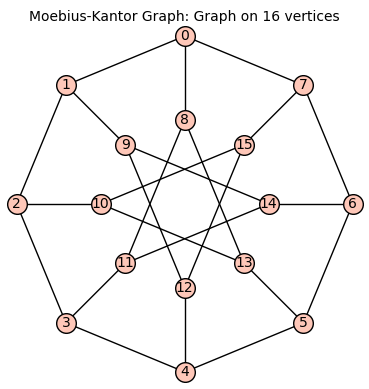

In [2]:
m=graphs.MoebiusKantorGraph()
m

In [94]:
[m.chromatic_number(),m.coloring()]

[2, [[1, 3, 5, 7, 8, 10, 12, 14], [0, 2, 4, 6, 9, 11, 13, 15]]]

In [3]:
m.distance_matrix()

[0 1 2 3 4 3 2 1 1 2 3 2 3 2 3 2]
[1 0 1 2 3 4 3 2 2 1 2 3 2 3 2 3]
[2 1 0 1 2 3 4 3 3 2 1 2 3 2 3 2]
[3 2 1 0 1 2 3 4 2 3 2 1 2 3 2 3]
[4 3 2 1 0 1 2 3 3 2 3 2 1 2 3 2]
[3 4 3 2 1 0 1 2 2 3 2 3 2 1 2 3]
[2 3 4 3 2 1 0 1 3 2 3 2 3 2 1 2]
[1 2 3 4 3 2 1 0 2 3 2 3 2 3 2 1]
[1 2 3 2 3 2 3 2 0 3 2 1 4 1 2 3]
[2 1 2 3 2 3 2 3 3 0 3 2 1 4 1 2]
[3 2 1 2 3 2 3 2 2 3 0 3 2 1 4 1]
[2 3 2 1 2 3 2 3 1 2 3 0 3 2 1 4]
[3 2 3 2 1 2 3 2 4 1 2 3 0 3 2 1]
[2 3 2 3 2 1 2 3 1 4 1 2 3 0 3 2]
[3 2 3 2 3 2 1 2 2 1 4 1 2 3 0 3]
[2 3 2 3 2 3 2 1 3 2 1 4 1 2 3 0]

In [5]:
list(map(lambda row:max(row),m.distance_matrix()))

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]

In [5]:
europe=graphs.EuropeMap(continental=True)

In [6]:
europe.is_connected()

True

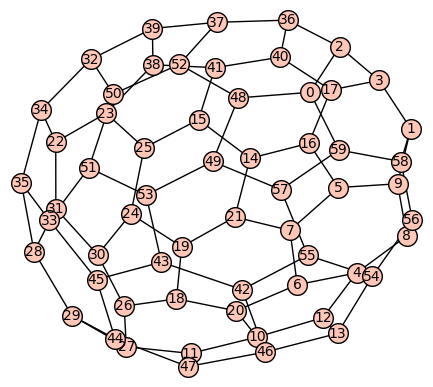

In [4]:
graphs.BuckyBall().plot(layout="spring")

<h3>
    Searching in Graphs
</h3>

<p>
    There are two basic search algorithms for graphs, the breadth-first and depth-first searches.  Here, we demonstrate the use of both of them. We start with a small, relatively sparse graph after seeding the random number generator.
</p>

In [30]:
ge.eccentricity()

[4, 5, 3, 4, 3, 4, 4, 3, 3, 3, 3, 4, 4, 4, 3, 3, 3, 4, 5, 4]

set_random_seed(2022)
r=graphs.RandomGNP(50,0.2)
r.plot()

<p>
    Starting at vertex, 0 in this case, we move in all possible directions along the edges of our graph to reach depth set 1, $D_1$.  From each of the vertices in $D_1$, we follow edges to new vertices and the collection of vertices reached in this step if depth set 2, $D_2$.  We repeat this process to for as each depth set is non-empty.  The result can be treated as an iterable or viewed all at once using list(), as we do here.
    </p>

In [12]:
bfs=r.breadth_first_search(4,report_distance='True')
list(bfs)

[(4, 0),
 (35, 1),
 (21, 1),
 (9, 1),
 (26, 1),
 (11, 1),
 (13, 1),
 (29, 1),
 (15, 1),
 (0, 2),
 (17, 2),
 (34, 2),
 (3, 2),
 (20, 2),
 (6, 2),
 (42, 2),
 (31, 2),
 (16, 2),
 (33, 2),
 (22, 2),
 (40, 2),
 (25, 2),
 (41, 2),
 (45, 2),
 (46, 2),
 (32, 2),
 (38, 2),
 (24, 2),
 (10, 2),
 (1, 2),
 (18, 2),
 (39, 2),
 (44, 2),
 (30, 2),
 (48, 2),
 (36, 2),
 (43, 2),
 (12, 2),
 (28, 2),
 (47, 2),
 (2, 2),
 (19, 2),
 (37, 2),
 (8, 3),
 (27, 3),
 (23, 3),
 (5, 3),
 (14, 3),
 (7, 3),
 (49, 3)]

<p>
    The maximum depth in a breadth-first search will be a lower bound on the diameter of the graph, which is the length of the longest "shortest path" between all vertices.
</p>

In [13]:
r.diameter()

4

In [9]:
r.distance_matrix()

50 x 50 dense matrix over Integer Ring (use the '.str()' method to see the entries)

In [14]:
r.eccentricity()

[3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3]

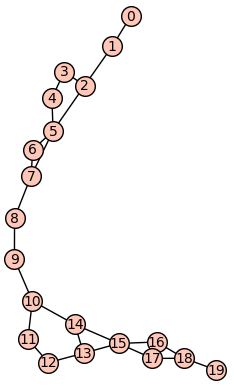

In [38]:
set_random_seed(8)
edges=[]
for pair in tuples(range(20),2):
    if pair[0]!=pair[1] and random()<0.7/abs(pair[0]-pair[1])^2:
        edges=edges+[pair]
ge=Graph(edges)
ge.plot()

In [39]:
ge.eccentricity()

[12, 11, 10, 11, 10, 9, 9, 8, 7, 6, 7, 8, 9, 9, 8, 9, 10, 10, 11, 12]

<h4>
    Depth first search
</h4>

<p>
    The method <c>depth_first_search</c>  return an iterator over the vertices in a depth-first ordering.
</p>

In [147]:
dfs=r.depth_first_search(start=0)

In [148]:
for v in dfs:
    print v

0
10
12
13
11
15
14
8
23
1
7
22
2
21
6
9
20
5
4
3
18
16
17
19


In [15]:
europe=graphs.EuropeMap(continental='True')

In [16]:
europe.diameter()

8

In [154]:
edfs=europe.depth_first_search(start='Greece')

In [155]:
for v in edfs:
    print v

Greece
Bulgaria
Macedonia
Serbia
Bosnia and Herzegovina
Croatia
Slovenia
Hungary
Austria
Switzerland
Germany
Belgium
France
Monaco
Andorra
Spain
Portugal
Luxembourg
Italy
Vatican City
San Marino
Netherlands
Denmark
Poland
Russia
Latvia
Belarus
Lithuania
Ukraine
Moldova
Romania
Slovakia
Czech Republic
Estonia
Norway
Sweden
Finland
Liechtenstein
Montenegro
Albania


<h3>
    Graphic Sequences
</h3>

<p>Here is the degree sequence of a random graph with six vertices.  Any such nonincreasing sequence of numbers that is the degree sequence of some graph is called a <b>graphic sequence</b>. </p>

In [117]:
rg=graphs.RandomGNP(6,0.5)
rg.degree_sequence()

[5, 4, 3, 3, 2, 1]

<p>
    How many sequences of <m>n</m> nonnegative integers are <q>graphic?</q>
</p><p>How many different degree sequences are there for an <m>n</m> vertex undirected graph?  Does a degree sequence uniquely determine an undirected graph.   For example, is there one graph with six vertices and degree sequence <m>[3,2,2,1,1,1]</m>?</p>

In [158]:
nds=0
found='False'
for ds in DegreeSequences(6):
    nds+=1
    if ds==[3,2,2,1,1,1]:
        found='True'
[nds,found]

[102, 'True']

<p>The output indicates that there are 102 different graphic sequences, with [3,2,2,1,1,1] being among them. </p>

<h3>
    Is a random connected graph hamiltonian?
</h3>

<p>
    The following three cells generate a random  connected graph, display it and determine whether it has a Hamiltonian circuit. The graph that is generated by including any possible edge with probability 0.2.

In [121]:
set_random_seed(33)
rg=graphs.RandomGNP(35,0.2)
while not(rg.is_connected()):
    rg=graphs.RandomGNP(35,0.2)

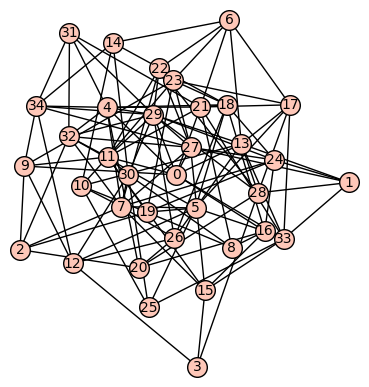

In [122]:
rg.plot()

In [123]:
rg.is_hamiltonian()

True

<p>
    Here is a more general function that does the same with any edge probabilty and number of vertices
</p>

In [125]:
def random_is_hamiltonian(n,p):
    rg=graphs.RandomGNP(n,p)
    while not(rg.is_connected()):
        rg=graphs.RandomGNP(n,p)
    return rg.is_hamiltonian()

<p>
    Here, we look at 100 random graph.
</p>

In [172]:
h=0
n=0
while n<100:
    if random_is_hamiltonian(35,0.2):
        h+=1
    n+=1
[h,n]

[83, 100]

<h3>
    Spanning Subgraphs
</h3>

<p>A spanning subgraph, H, of G is one for which V(H)=V(G).</p>
<p>
    In this code, we save the location of vertices so that we can see them in the same location as we change the edge set.
</p>

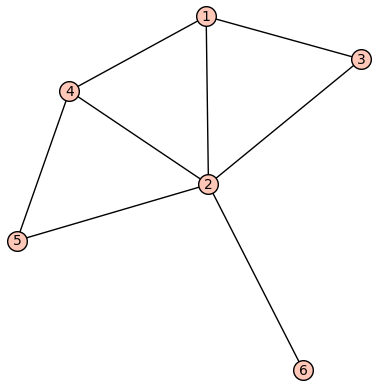

In [10]:
s=Graph({1:[2,3],2:[4,5,6],3:[2],4:[1,5]})
s.plot(save_pos=True)

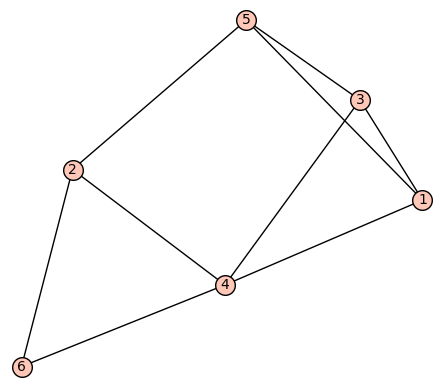

In [164]:
g=Graph({1:[3,4,5],2:[4,5],3:[4,5],6:[2,4]})
g.plot(save_pos=True)

<p>We use the method <c>get_pos</c> to save the positioning of the six vertices above for display in subgraphs.
</p>

In [165]:
posit=g.get_pos()
posit

{1: [2.0992861727450967, -0.036750179411531324],
 2: [0.7981609178354417, 0.0769647212931737],
 3: [1.8667616527196658, 0.3353400050650127],
 4: [1.3650119528479903, -0.35211207237003556],
 5: [1.4439429600361124, 0.632230521487833],
 6: [0.6085787549121144, -0.6556729960644523]}

<p>
    <c>spanning_trees</c> generates a list of all spanning trees of a graph.  Here we display the first in the list.  We use the option <c>pos</c> with the positioning dictionary we got from <c>g</c> so that the vertices are in the same position in the spanning tree as the original graph.
</p>

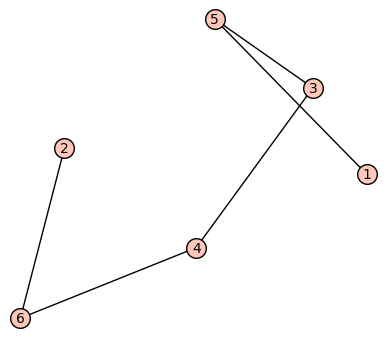

In [166]:
h2=g.spanning_trees()[0]
h2.show(pos=posit)

<p>
    Here is the number of different spanning trees of <c>g</c>.
</p>

In [168]:
len(g.spanning_trees())

64

<p>
    Here is another example with the same graph, with three spanning subgraphs, only one of which is a spanning subtree.
</p>

{1: [1.7041248226468992, 0.3785628462819162], 2: [0.4940222901697767, -0.0921898904807315], 3: [1.2937896827606008, 0.27208081727655253], 4: [1.2043972393571543, -0.37982103088689023], 6: [0.5401759191694008, -0.8736374508823104]}


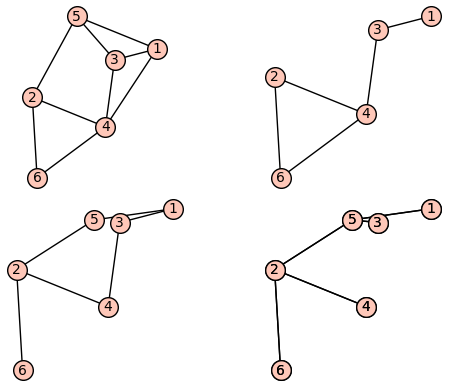

In [134]:
g=Graph({1:[3,4,5],2:[4,5],3:[4,5],6:[2,4]})
p1=g.plot(save_pos=True)
posit=g.get_pos()
p1a=g.plot(pos=posit)
posit_r=posit
posit_r.pop(5)
print posit_r
h1=Graph({1:[3],2:[4],3:[4],6:[2,4]})
p2=h1.plot(pos=posit_r)
h2=Graph({1:[3,5],2:[4,5],3:[4],6:[2]})
p3=h2.plot(pos=posit)
h3=g.spanning_trees()[9]
p4=h3.plot(pos=posit)
fig=graphics_array(((p1a,p2),(p3,p4)))
fig

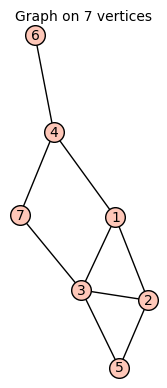

In [3]:
Graph({1:[2,3,4],2:[3,5],3:[5,7],4:[6,7]})

In [18]:
d={}
for i in range(20):
    e=[]
    for j in range(20)[i+1:]:
        if (i-j)%3==0:
            e=e+[j]
    d[i]=e
g=Graph(d)

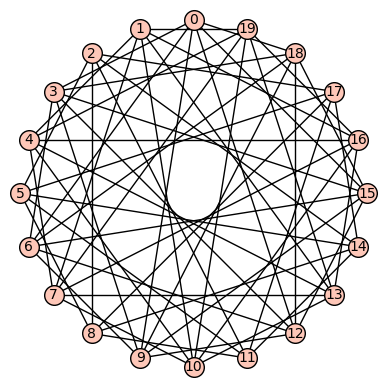

In [19]:
g.plot(layout='circular')

<h2>
    Coloring
   
</h2>

In [3]:
g=Graph({1:[5,6,7,8],2:[3,6,7],3:[4,5,8],4:[7],6:[7]})

In [5]:
g.is_planar()

True

In [6]:
g.chromatic_number()

3

In [7]:
g.coloring()

[[1, 2, 4], [5, 8, 6], [3, 7]]

In [24]:
G=graphs.FibonacciTree(5)

In [26]:
G.eccentricity(5)

6